In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
# from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import os

# Define the relative path to dataset_final.csv
file_path = os.path.join(os.pardir, os.pardir, 'data', 'dataset_final_cleaned.csv')

# Load the CSV file using pandas (example usage)
df = pd.read_csv(file_path)

In [3]:
# Linhas e colunas
df.shape

(7885, 14)

In [21]:
df.dtypes

title                          object
tag                            object
artist                         object
views                           int64
features                       object
lyrics                         object
lastfm_different_listeners    float64
lastfm_playcount              float64
lastfm_tags                    object
lastfm_content_song            object
lastfm_content_artist          object
lastfm_image_artist            object
lastfm_image_album             object
album                          object
dtype: object

In [22]:
df['lastfm_image_artist'].head(10)

0                                                  NaN
1    https://lastfm.freetls.fastly.net/i/u/300x300/...
2    https://lastfm.freetls.fastly.net/i/u/300x300/...
3    https://lastfm.freetls.fastly.net/i/u/300x300/...
4    https://lastfm.freetls.fastly.net/i/u/300x300/...
5    https://lastfm.freetls.fastly.net/i/u/300x300/...
6    https://lastfm.freetls.fastly.net/i/u/300x300/...
7    https://lastfm.freetls.fastly.net/i/u/300x300/...
8    https://lastfm.freetls.fastly.net/i/u/300x300/...
9    https://lastfm.freetls.fastly.net/i/u/300x300/...
Name: lastfm_image_artist, dtype: object

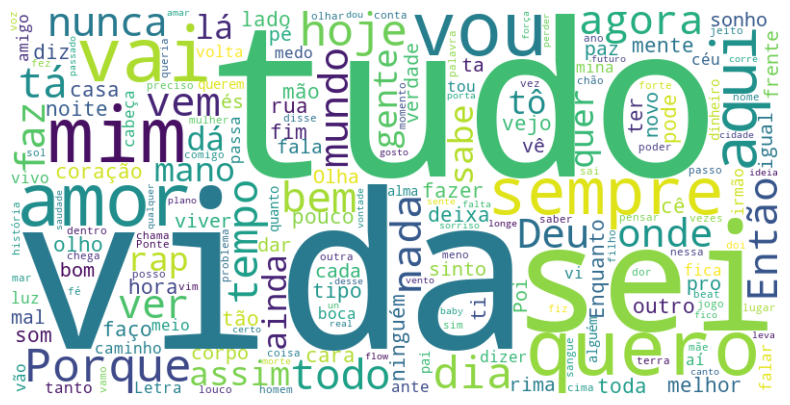

In [33]:
# Combina as letras em uma única string
lyrics = df['lyrics'].dropna().str.cat(sep=' ')

# Obtém as stopwords do NLTK
nltk_stopwords = set(stopwords.words('portuguese'))  # Use 'english' para inglês

# Define suas palavras personalizadas
custom_words = {'Refrão', 'pra', 'Verso','puta','nigga','2x','foda','porra','oh','merda','Intro'} 

# Cria a união das stopwords
custom_stopwords = set(STOPWORDS).union(nltk_stopwords).union(custom_words)

# Cria a nuvem de palavras com stopwords
try:
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(lyrics)
except ValueError as e:
    print(f"Erro ao gerar a nuvem de palavras: {e}")
    wordcloud = None  # Define wordcloud como None se houver erro

# Verifica se wordcloud foi gerada antes de plotar
if wordcloud:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove os eixos
    plt.show()
else:
    print("A nuvem de palavras não pôde ser gerada.")


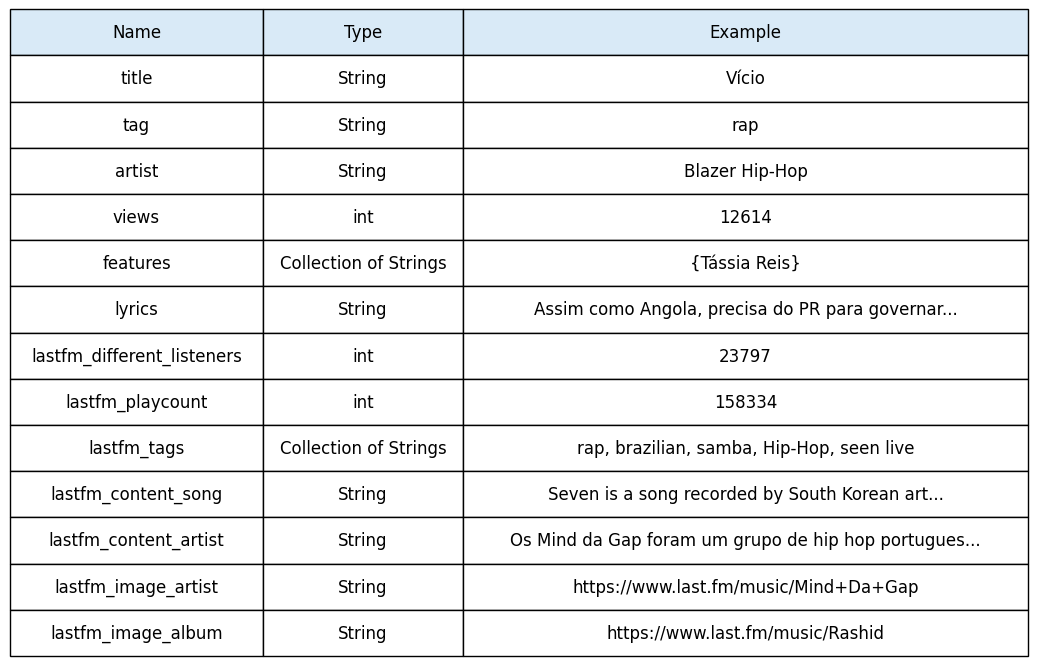

In [18]:
def table_items_identification():
    # Dados da tabela
    data = [
        ['Name', 'Type', 'Example'],
        ['title', 'String', "Vício"],
        ['tag', 'String', "rap"],
        ['artist', 'String', "Blazer Hip-Hop"],
        ['views', 'int', "12614"],
        ['features', 'Collection of Strings', "{Tássia Reis}"],
        ['lyrics', 'String', "Assim como Angola, precisa do PR para governar..."],
        ['lastfm_different_listeners', 'int', "23797"],
        ['lastfm_playcount', 'int', "158334"],
        ['lastfm_tags', 'Collection of Strings', "rap, brazilian, samba, Hip-Hop, seen live"],
        ['lastfm_content_song', 'String', "Seven is a song recorded by South Korean art..."],
        ['lastfm_content_artist', 'String', "Os Mind da Gap foram um grupo de hip hop portugues..."],
        ['lastfm_image_artist', 'String', "https://www.last.fm/music/Mind+Da+Gap"],
        ['lastfm_image_album', 'String', "https://www.last.fm/music/Rashid"],
    ]

    # Criando a figura e os eixos com tamanho maior
    fig, ax = plt.subplots(figsize=(6, 6))  # Aumentar o tamanho da figura

    # Ocultar os eixos
    ax.axis('tight')
    ax.axis('off')

    # Criar a tabela com tamanho de fonte ajustado e maior largura de células
    table = ax.table(cellText=data, loc='center', cellLoc='center', colWidths=[0.15, 0.2, 0.65])

    # Ajustar o tamanho da fonte
    table.auto_set_font_size(False)  # Desativar o ajuste automático
    table.set_fontsize(12)  # Definir o tamanho da fonte maior

    # Ajustar a largura das colunas manualmente para garantir maior espaço
    for i in range(len(data[0])):
        table.auto_set_column_width(i)

    # Definir a cor de fundo da primeira linha (cabeçalho)
    for i in range(len(data[0])):  # Itera pelo número de colunas
        cell = table[(0, i)]  # Acessa cada célula da primeira linha
        cell.set_facecolor('#d9eaf7')  # Definir cor de fundo

    # Aumentar a altura das células
    for key, cell in table.get_celld().items():
        cell.set_height(0.1)  # Ajustar a altura das células (modificar esse valor para ajustar)

    # Exibir a tabela
    plt.show()

# Chamada da função
table_items_identification()


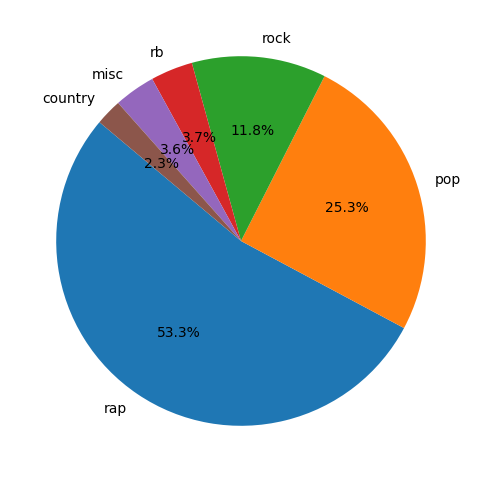

In [12]:
def pie_chart_for_a_column(dataset, column):
    # Verificar se a coluna existe no dataset
    if column not in dataset.columns:
        print(f"A coluna '{column}' não foi encontrada no dataset.")
        return

    # Verificar se a coluna é não numérica
    if dataset[column].dtype == 'object' or dataset[column].dtype == 'category':
        # Contar elementos de diferentes categorias
        category_counts = dataset[column].value_counts()

        # Criar gráfico de pizza
        plt.figure(figsize=(6, 6))
        category_counts.plot.pie(autopct='%1.1f%%', startangle=140)
        # plt.title(f'Distribution of {column}')
        plt.ylabel('')  # Remove o rótulo do eixo Y
        plt.show()
    else:
        print(f"A coluna '{column}' é numérica. Por favor, escolha uma coluna não numérica.")

pie_chart_for_a_column(df,'tag')

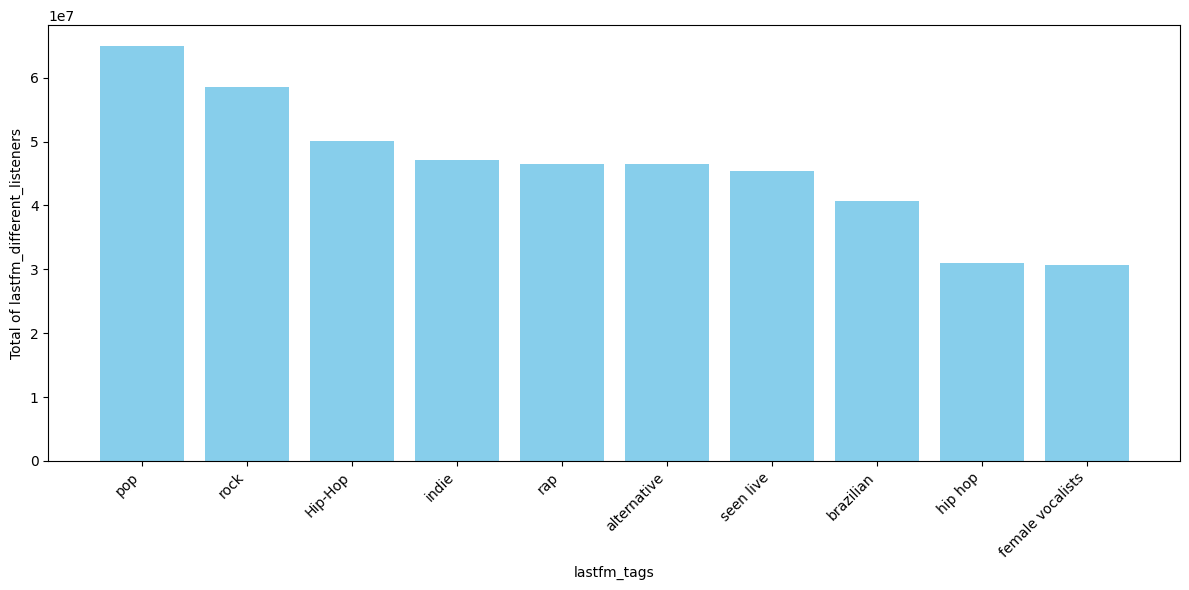

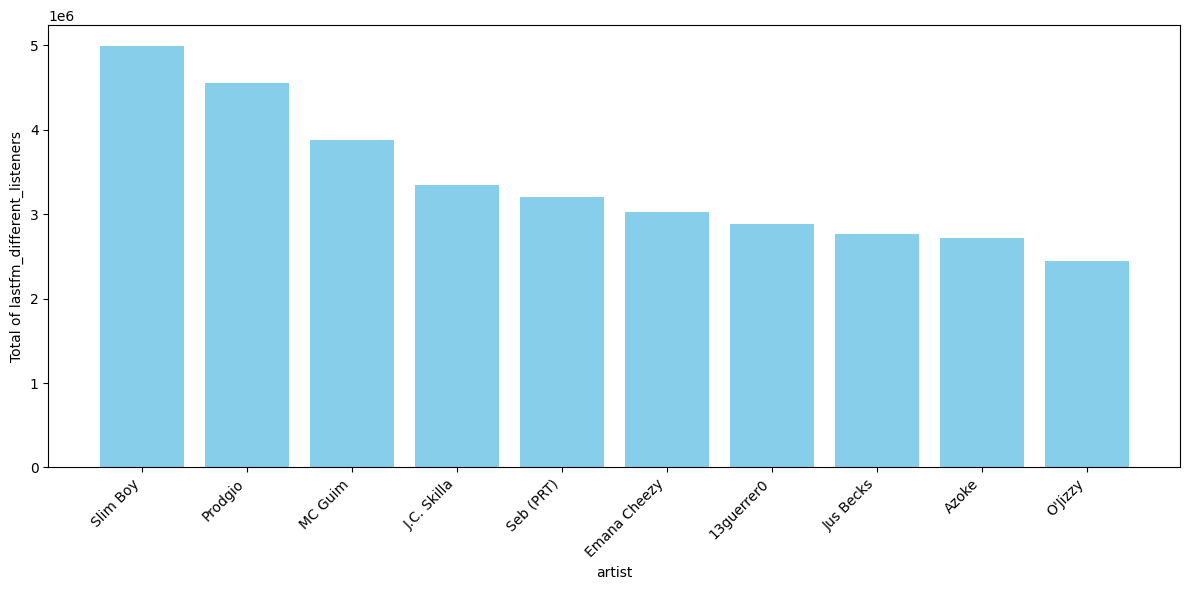

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def bar_chart_for_a_column_column(dataset, column1, column2, top_n=10):
    # Verificar se as colunas existem no dataset
    if column1 not in dataset.columns:
        print(f"A coluna '{column1}' não foi encontrada no dataset.")
        return
    elif column2 not in dataset.columns:
        print(f"A coluna '{column2}' não foi encontrada no dataset.")
        return
    
    dic = {}
    
    # Iterar sobre as linhas do dataset
    for i, row in dataset.iterrows():
        # Verificar se a coluna1 contém uma string e não está vazia
        if pd.notna(row[column1]) and isinstance(row[column1], str):
            # Dividir as tags por vírgula e remover espaços em branco
            tags = [tag.strip() for tag in row[column1].split(',')]
            for tag in tags:
                if tag in dic:
                    dic[tag] += int(row[column2])
                else:
                    dic[tag] = int(row[column2])

    # Ordenar o dicionário pelos valores e pegar os top_n maiores
    top_items = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True)[:top_n])
    
    # Criar gráfico de barras com os top_n maiores valores
    plt.figure(figsize=(12, 6))
    plt.bar(top_items.keys(), top_items.values(), color='skyblue')
    #plt.title(f'Top {top_n} Distribution of {column1} by {column2}')
    plt.ylabel(f'Total of {column2}')
    plt.xlabel(f'{column1}')
    plt.xticks(rotation=45, ha="right")  # Rotacionar rótulos no eixo X para melhor visualização
    plt.tight_layout()  # Ajustar layout para evitar corte dos rótulos
    plt.show()

# Exemplo de uso
bar_chart_for_a_column_column(df, 'lastfm_tags', 'lastfm_different_listeners', top_n=10)
bar_chart_for_a_column_column(df, 'artist', 'lastfm_different_listeners', top_n=10)


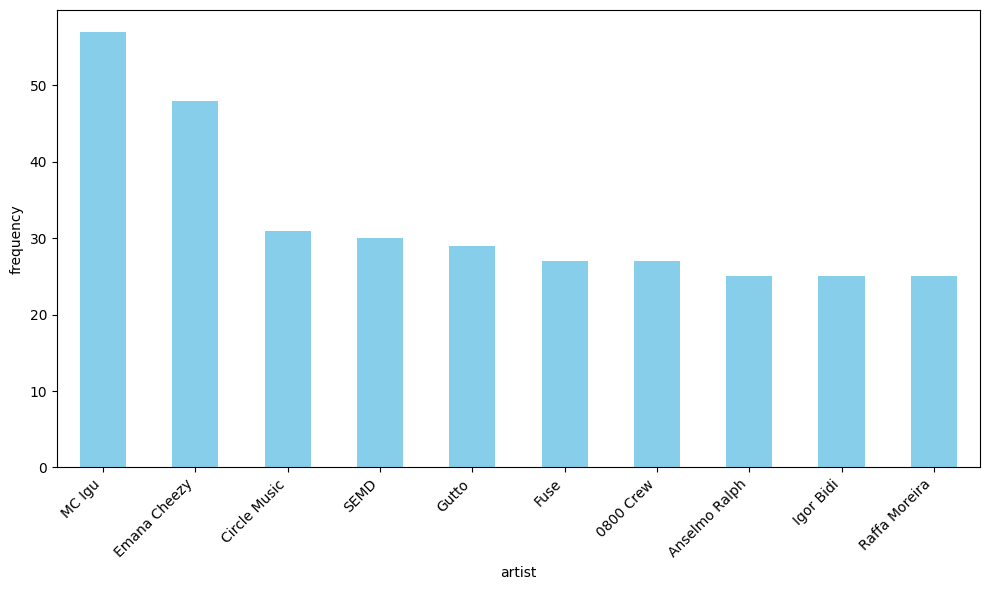

In [13]:
def most_frequent_values(dataset, column, top_n=0):
    # Verificar se a coluna existe no dataset
    if column not in dataset.columns:
        print(f"A coluna '{column}' não foi encontrada no dataset.")
        return

    # Contar a frequência de cada valor na coluna
    value_counts = dataset[column].value_counts()

    # Verificar se top_n foi especificado
    if top_n > 0:
        most_frequent = value_counts.head(top_n)  # Pegar os top_n valores mais frequentes
    else:
        most_frequent = value_counts.head(1)  # Pegar o valor mais frequente

    # Criar gráfico de barras
    plt.figure(figsize=(10, 6))
    most_frequent.plot(kind='bar', color='skyblue')
    # plt.title(f'Top {top_n} most frequent "{column}"')
    plt.ylabel('frequency')
    plt.xlabel(column)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Exemplo de uso
most_frequent_values(df, 'artist', 10)

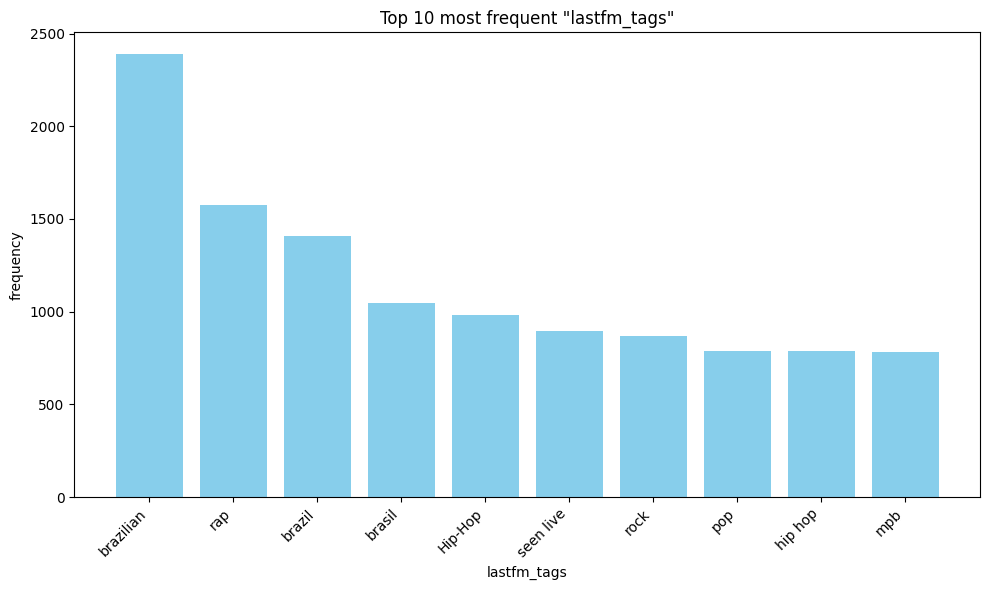

In [15]:
def most_frequent_values_if_string_with_different_values(dataset, column, top_n=0):
    # Verificar se a coluna existe no dataset
    if column not in dataset.columns:
        print(f"A coluna '{column}' não foi encontrada no dataset.")
        return

    # Dividir as strings separadas por vírgulas em tags individuais
    all_tags = dataset[column].dropna().str.split(',').explode().str.strip()

    # Contar a frequência de cada tag
    tag_counts = Counter(all_tags)

    # Criar um DataFrame a partir do contador
    tag_counts_df = pd.DataFrame(tag_counts.items(), columns=[column, 'Frequência'])

    # Ordenar pelo número de ocorrências
    tag_counts_df = tag_counts_df.sort_values(by='Frequência', ascending=False)

    # Verificar se top_n foi especificado
    if top_n > 0:
        most_frequent = tag_counts_df.head(top_n)  # Pegar os top_n valores mais frequentes
    else:
        most_frequent = tag_counts_df.head(1)  # Pegar o valor mais frequente

    # Criar gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(most_frequent[column], most_frequent['Frequência'], color='skyblue')
    plt.title(f'Top {top_n} most frequent "{column}"')
    plt.ylabel('frequency')
    plt.xlabel(column)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Exemplo de uso
most_frequent_values_if_string_with_different_values(df, 'lastfm_tags', 10)


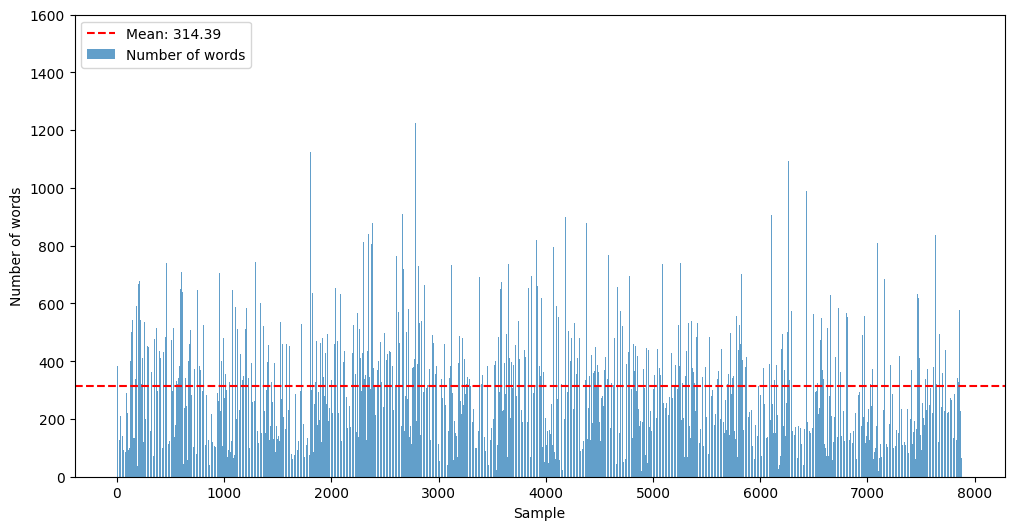

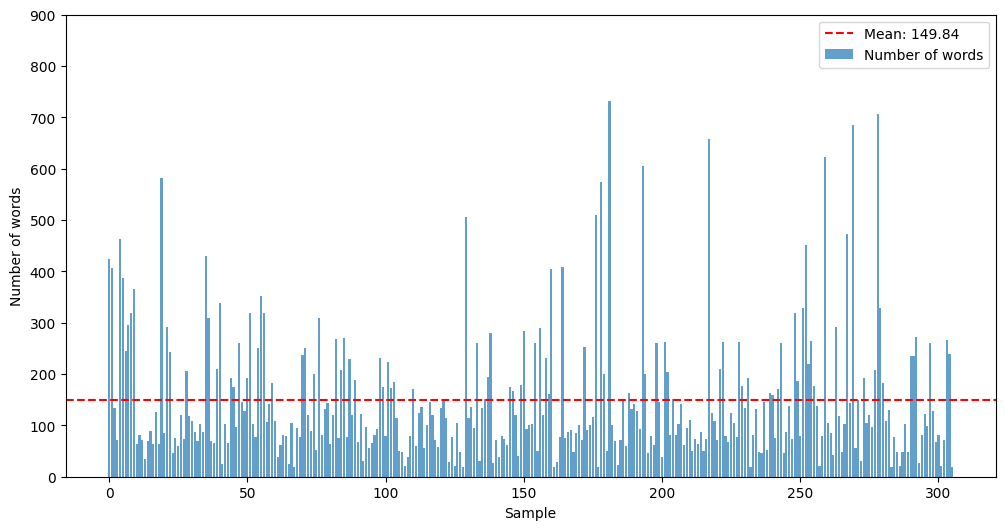

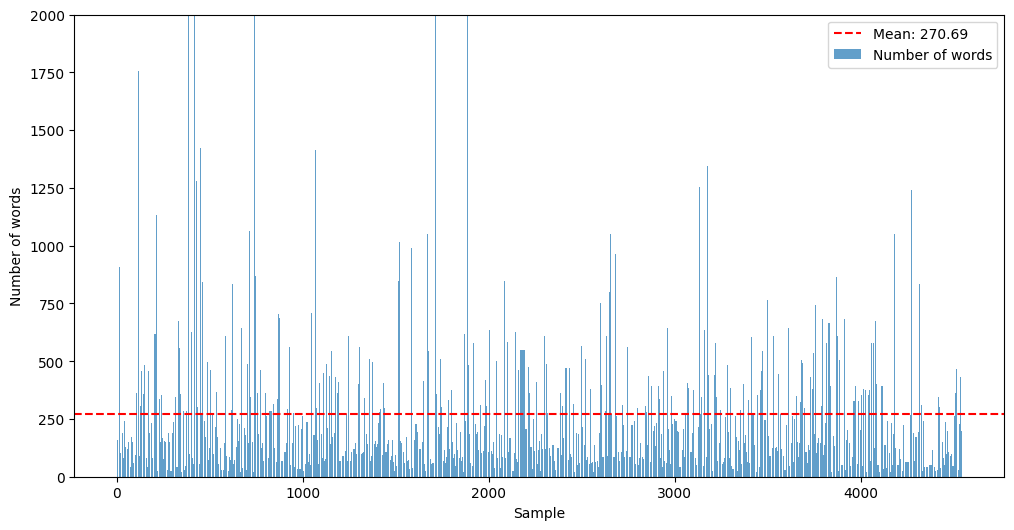

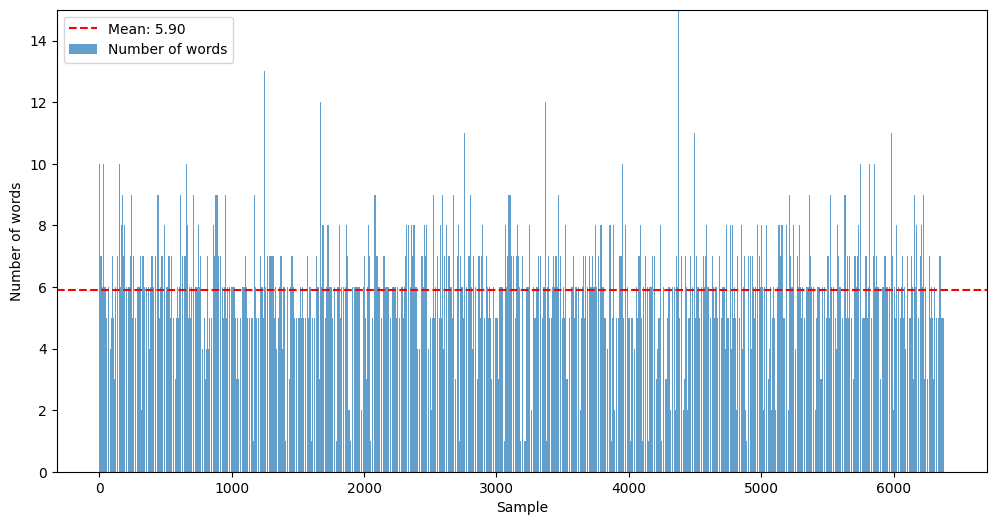

In [9]:
def plot_word_count_with_average(dataset, column,graph_height):
    # Verificar se a coluna existe no dataset
    if column not in dataset.columns:
        print(f"A coluna '{column}' não foi encontrada no dataset.")
        return

    # Contar o número de palavras em cada revisão
    word_counts = dataset[column].dropna().apply(lambda x: len(str(x).split()))

    # Calcular a média
    average = word_counts.mean()

    # Configurar o gráfico
    plt.figure(figsize=(12, 6))
    
    # Criar um gráfico de barras para o número de palavras
    plt.bar(range(len(word_counts)), word_counts, alpha=0.7, label='Number of words')
    
    # Adicionar uma linha de média
    plt.axhline(y=average, color='r', linestyle='--', label=f'Mean: {average:.2f}')

    # Ajustar o limite do eixo Y
    plt.ylim(0, graph_height)  # Definir o limite inferior como 0 e o superior como 100
    
    # Adicionar rótulos e título
    # plt.title(f'Number of words in {column}')
    plt.xlabel('Sample')
    plt.ylabel('Number of words')
    plt.legend()
    
    # Exibir o gráfico
    plt.show()

plot_word_count_with_average(df,"lyrics",1600)
plot_word_count_with_average(df,"lastfm_content_song",900)
plot_word_count_with_average(df,"lastfm_content_artist",2000)
plot_word_count_with_average(df,"lastfm_tags",15)